# 1. 이미지 저장

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

heat = pd.read_csv("../data/train_heat.csv", index_col=0)
heat.columns = heat.columns.str.replace("train_heat.", "", regex=False)
heat.head()

In [ ]:
# 날짜 데이터를 데이트타임으로 변경
heat['tm'] = pd.to_datetime(heat['tm'].astype(str), format="%Y%m%d%H")

heat['year'] = heat['tm'].dt.year
heat['month'] = heat['tm'].dt.month
heat['day'] = heat['tm'].dt.day
heat['hour'] = heat['tm'].dt.hour

In [ ]:
# 브랜치·월·시간별 평균 열수요 (라인플롯)
import os

# 저장 폴더 생성 (없는 경우)
save_dir = "images"
os.makedirs(save_dir, exist_ok=True)

for b in heat.branch_id.unique():
    df = heat[heat['branch_id'] == b]
    pivot = df.pivot_table(index='hour', columns='month', values='heat_demand', aggfunc='mean')

    plt.figure(figsize=(10,4))
    for m in pivot.columns:
        plt.plot(pivot.index, pivot[m], label=f'Month {m}')

    plt.title(f'Branch {b} - Average heat demand by time of month')
    plt.xlabel('Hour')
    plt.ylabel('Heat Demand')
    # plt.legend()
    plt.tight_layout()  # 여백 자동 조정
    plt.ylim(0, 700)

    # 파일명 생성 및 저장
    filename = f"{b}-1.png"
    filepath = os.path.join(save_dir, filename)
    plt.savefig(filepath, dpi=300)  # 고해상도로 저장
    plt.close()  # 메모리 누수 방지를 위해 그림 객체 닫기

    print(f"저장 완료: {filepath}")


In [ ]:
# 히트맵

# 모든 브랜치에 대해 반복
for branch in heat.branch_id.unique():
    # 현재 브랜치 데이터만 필터링
    branch_data = heat[heat['branch_id'] == branch]

    # 월별 평균 열수요 계산
    pivot = branch_data.pivot_table(index='hour', columns='month', values='heat_demand', aggfunc='mean')

    # 그래프 생성
    plt.figure(figsize=(10, 4))
    sns.heatmap(pivot, cmap='YlGnBu', annot=False, cbar_kws={'label': 'Heat Demand'})
    plt.title(f'Branch {branch} - Monthly Heat Demand by Hour')
    plt.xlabel('Month')
    plt.ylabel('Hour')
    plt.tight_layout()

    # 파일로 저장
    filename = f"{branch}-2.png"
    filepath = os.path.join(save_dir, filename)
    plt.savefig(filepath, dpi=300)
    plt.close()

    print(f"저장 완료: {filepath}")


# 2. 이미지 클러스터링

In [2]:
import os

# 이미지가 저장된 폴더 경로
image_dir = 'images'

# 모든 png 파일 목록 불러오기
image_files = sorted([f for f in os.listdir(image_dir) if f.endswith('.png')])

# 예시 출력
for file in image_files:
    print(file)


A-1.png
A-2.png
B-1.png
B-2.png
C-1.png
C-2.png
D-1.png
D-2.png
E-1.png
E-2.png
F-1.png
F-2.png
G-1.png
G-2.png
H-1.png
H-2.png
I-1.png
I-2.png
J-1.png
J-2.png
K-1.png
K-2.png
L-1.png
L-2.png
M-1.png
M-2.png
N-1.png
N-2.png
O-1.png
O-2.png
P-1.png
P-2.png
Q-1.png
Q-2.png
R-1.png
R-2.png
S-1.png
S-2.png


In [4]:
from collections import defaultdict

branch_images = defaultdict(list)

for file in image_files:
    branch = file.split('-')[0]  # 'A-1.png' → 'A'
    image_path = os.path.join(image_dir, file)
    branch_images[branch].append(image_path)

# 예시 확인
for branch, imgs in branch_images.items():
    print(f"{branch}: {imgs}")


A: ['images/A-1.png', 'images/A-2.png']
B: ['images/B-1.png', 'images/B-2.png']
C: ['images/C-1.png', 'images/C-2.png']
D: ['images/D-1.png', 'images/D-2.png']
E: ['images/E-1.png', 'images/E-2.png']
F: ['images/F-1.png', 'images/F-2.png']
G: ['images/G-1.png', 'images/G-2.png']
H: ['images/H-1.png', 'images/H-2.png']
I: ['images/I-1.png', 'images/I-2.png']
J: ['images/J-1.png', 'images/J-2.png']
K: ['images/K-1.png', 'images/K-2.png']
L: ['images/L-1.png', 'images/L-2.png']
M: ['images/M-1.png', 'images/M-2.png']
N: ['images/N-1.png', 'images/N-2.png']
O: ['images/O-1.png', 'images/O-2.png']
P: ['images/P-1.png', 'images/P-2.png']
Q: ['images/Q-1.png', 'images/Q-2.png']
R: ['images/R-1.png', 'images/R-2.png']
S: ['images/S-1.png', 'images/S-2.png']


In [5]:
import torch
from torchvision import models, transforms
from PIL import Image

# 사전 학습된 ResNet50 불러오기 (FC layer 제거)
resnet = models.resnet50(pretrained=True)
resnet = torch.nn.Sequential(*list(resnet.children())[:-1])  # 마지막 FC 레이어 제거
resnet.eval()

# 이미지 전처리
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 183MB/s]


In [6]:
def extract_embedding(image_path):
    image = Image.open(image_path).convert('RGB')
    tensor = transform(image).unsqueeze(0)  # 배치 차원 추가
    with torch.no_grad():
        embedding = resnet(tensor).squeeze().numpy()  # [2048]-dim 벡터
    return embedding


In [7]:
from collections import defaultdict
import numpy as np
import os

image_dir = 'images'  # 이미지 폴더명
image_files = sorted([f for f in os.listdir(image_dir) if f.endswith('.png')])

# 브랜치별로 이미지 경로 정리
branch_images = defaultdict(list)
for file in image_files:
    branch = file.split('-')[0]
    branch_images[branch].append(os.path.join(image_dir, file))

# 브랜치별 벡터 생성
branch_vectors = []
branch_names = []

for branch, paths in branch_images.items():
    embeddings = [extract_embedding(p) for p in paths]
    avg_vector = np.mean(embeddings, axis=0)
    branch_vectors.append(avg_vector)
    branch_names.append(branch)


In [17]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=0)
clusters = kmeans.fit_predict(branch_vectors)


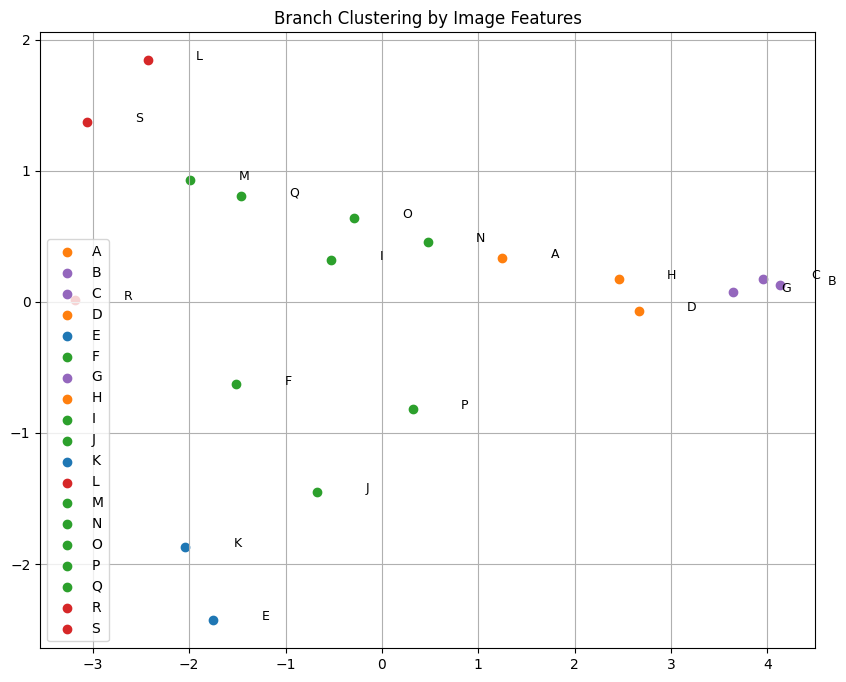

In [18]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# 2차원으로 축소
pca = PCA(n_components=2)
reduced = pca.fit_transform(branch_vectors)

# 시각화
plt.figure(figsize=(10, 8))
for i, name in enumerate(branch_names):
    plt.scatter(reduced[i, 0], reduced[i, 1], label=name, c=f"C{clusters[i]}")
    plt.text(reduced[i, 0]+0.5, reduced[i, 1], name, fontsize=9)

plt.title('Branch Clustering by Image Features')
plt.legend()
plt.grid(True)
plt.show()


In [19]:
from sklearn.metrics import silhouette_score

score = silhouette_score(branch_vectors, clusters)
print(f"Silhouette Score: {score:.3f}")


Silhouette Score: 0.236


In [20]:
from sklearn.metrics import calinski_harabasz_score

score = calinski_harabasz_score(branch_vectors, clusters)
print(f"Calinski-Harabasz Score: {score:.2f}")


Calinski-Harabasz Score: 8.90


In [21]:
from sklearn.metrics import davies_bouldin_score

score = davies_bouldin_score(branch_vectors, clusters)
print(f"Davies-Bouldin Score: {score:.3f}")


Davies-Bouldin Score: 1.042


In [22]:
from collections import defaultdict

cluster_map = defaultdict(list)
for name, label in zip(branch_names, clusters):
    cluster_map[label].append(name)

for label, names in cluster_map.items():
    print(f"Cluster {label}: {names}")


Cluster 1: ['A', 'D', 'H']
Cluster 4: ['B', 'C', 'G']
Cluster 0: ['E', 'K']
Cluster 2: ['F', 'I', 'J', 'M', 'N', 'O', 'P', 'Q']
Cluster 3: ['L', 'R', 'S']


In [24]:
# branch_names = ['A', 'B', 'C', ...]
# clusters = [0, 1, 2, ...]  # branch에 대응하는 클러스터 ID
# branch_images = {'A': [path1, path2], 'B': [path3, path4], ...}

from shutil import copyfile
import os

output_dir = "clustered_images_by_branch"
os.makedirs(output_dir, exist_ok=True)

# 클러스터별 폴더 생성
for cluster_id in set(clusters):
    os.makedirs(os.path.join(output_dir, f"cluster_{cluster_id}"), exist_ok=True)

# 브랜치 단위로 복사
for branch, cluster_id in zip(branch_names, clusters):
    for img_path in branch_images[branch]:
        dst = os.path.join(output_dir, f"cluster_{cluster_id}", os.path.basename(img_path))
        copyfile(img_path, dst)


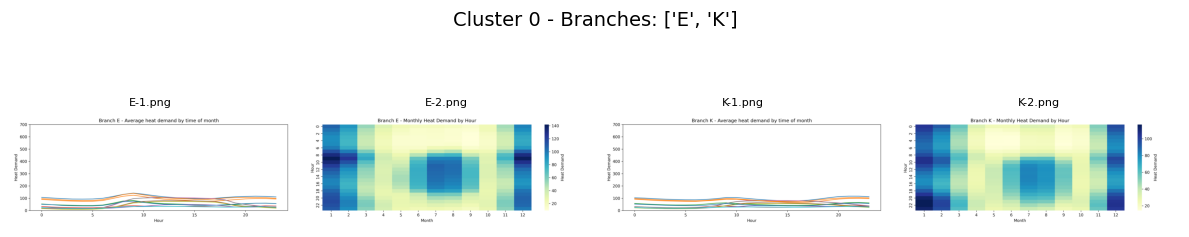

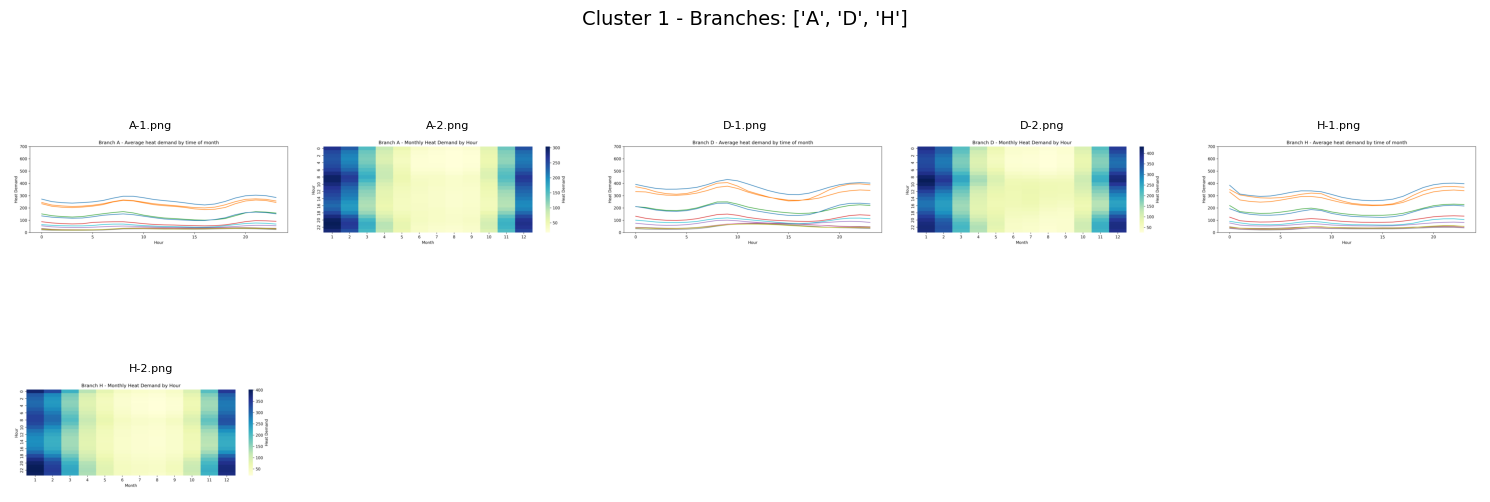

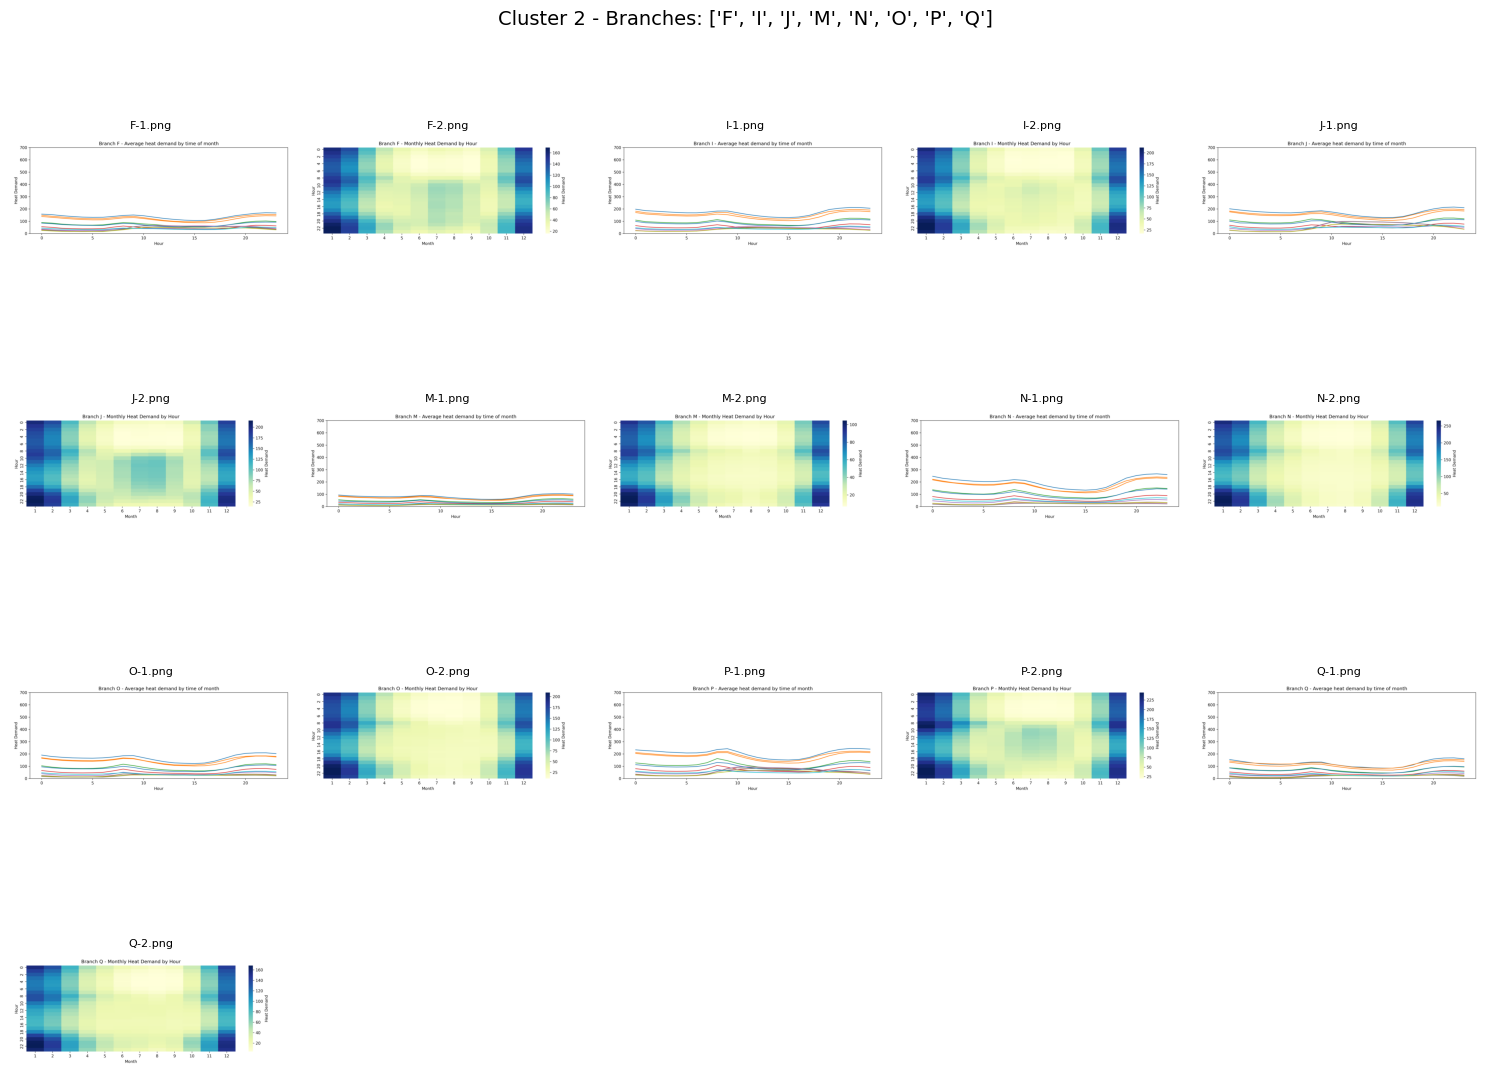

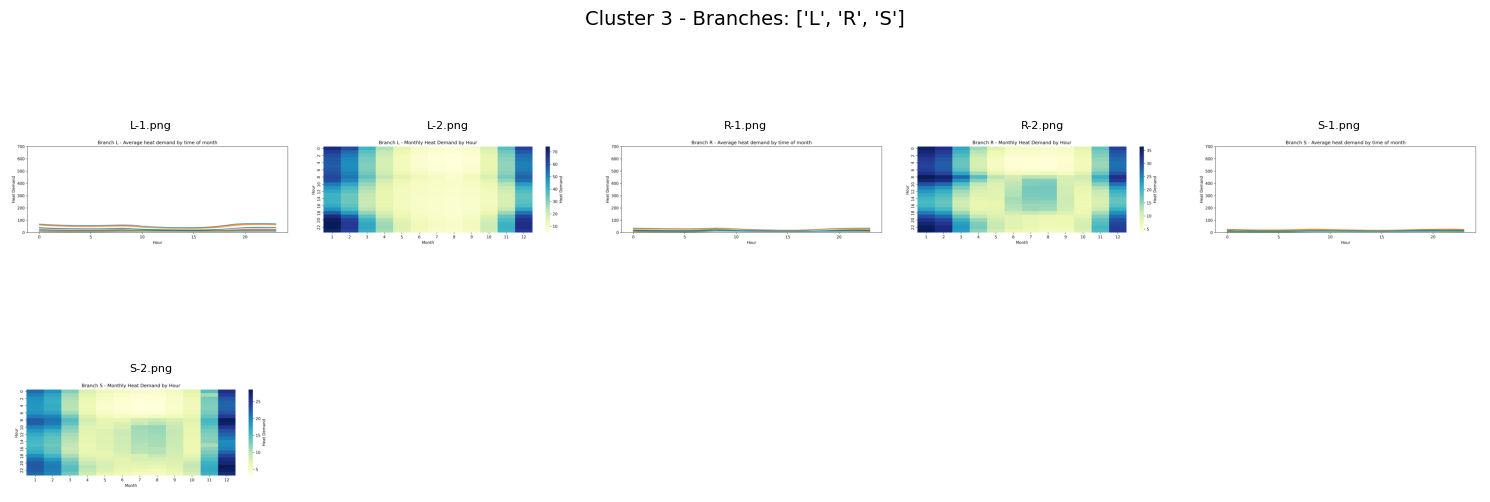

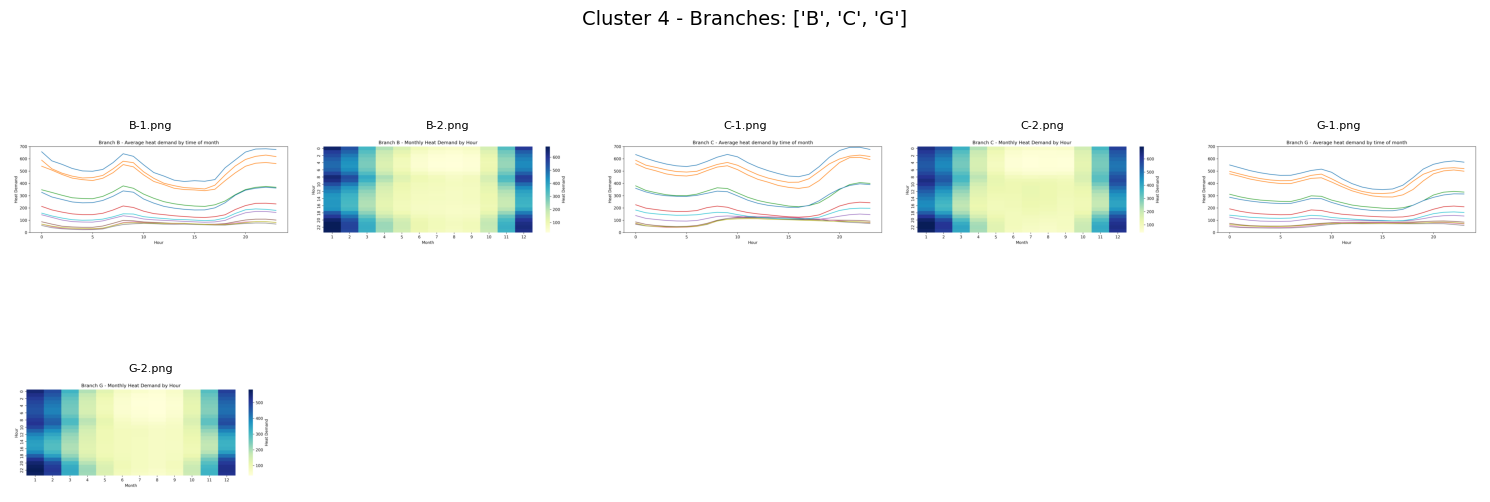

In [25]:
# branch 단위로 이미지 보여주는 시각화
import matplotlib.pyplot as plt
from PIL import Image

for cluster_id in set(clusters):
    branches_in_cluster = [b for b, c in zip(branch_names, clusters) if c == cluster_id]
    images = []
    for b in branches_in_cluster:
        images.extend(branch_images[b])

    cols = min(5, len(images))
    rows = (len(images) + cols - 1) // cols
    plt.figure(figsize=(3 * cols, 3 * rows))
    plt.suptitle(f"Cluster {cluster_id} - Branches: {branches_in_cluster}", fontsize=14)

    for i, path in enumerate(images):
        image = Image.open(path)
        plt.subplot(rows, cols, i+1)
        plt.imshow(image)
        plt.axis('off')
        plt.title(os.path.basename(path), fontsize=8)

    plt.tight_layout()
    plt.show()
